Importing Datatset

In [ ]:
!pip install datasets pandas numpy matplotlib seaborn wordcloud tqdm --quiet

In [ ]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from tqdm import tqdm

# For pretty plots
sns.set(style="whitegrid")

In [ ]:
dataset = load_dataset("0xnbk/resume-ats-score-v1-en")
dataset

README.md: 0.00B [00:00, ?B/s]

train.csv:   0%|          | 0.00/43.3M [00:00<?, ?B/s]

validation.csv:   0%|          | 0.00/10.7M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5099 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1275 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'ats_score', 'original_label'],
        num_rows: 5099
    })
    validation: Dataset({
        features: ['text', 'ats_score', 'original_label'],
        num_rows: 1275
    })
})

In [ ]:
train_df = dataset["train"].to_pandas()
val_df = dataset["validation"].to_pandas()

EDA

In [ ]:
# Shape
print("Train shape:", train_df.shape)
print("Validation shape:", val_df.shape)

# Column types
train_df.info()

# Check missing values
train_df.isna().sum()

Train shape: (5099, 3)
Validation shape: (1275, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   text            5099 non-null   object 
 1   ats_score       5099 non-null   float64
 2   original_label  5099 non-null   object 
dtypes: float64(1), object(2)
memory usage: 119.6+ KB


,0
text,0
ats_score,0
original_label,0


Random Sample

In [ ]:
train_df.sample(3).iloc[0]['text']

'SummaryFinancial Accountant specializing in financial planning, reporting and analysis in both private and public sectors.Well-informed accountant adept at supplying quick responses to financial inquiries from internal management and potential clients.Creative accountant equipped with a broad knowledge of concepts and strategies to yield the best possible financial outcomes. HighlightsPeriodic financial reporting expertInvoice coding familiarityStrong communication skillsGeneral ledger accounting skillsComplex problem solvingAccount reconciliation expert ExperienceAccountant,06 2012-09 2015Ametek, Inc. Wilmington,MA,I have worked at Shantilal Gala Company (Nairobi, Kenya) which is an Audit firm, since 2nd July 2012.I was employed as an Accountant in the Firm.Maintained accounts receivable documentation electronically and on paper.Processed bank reconciliations and financial reports to verify practice of p weekly and monthly.Increased efficiency and alleviated work loads by creating a 

Text Length Analysis

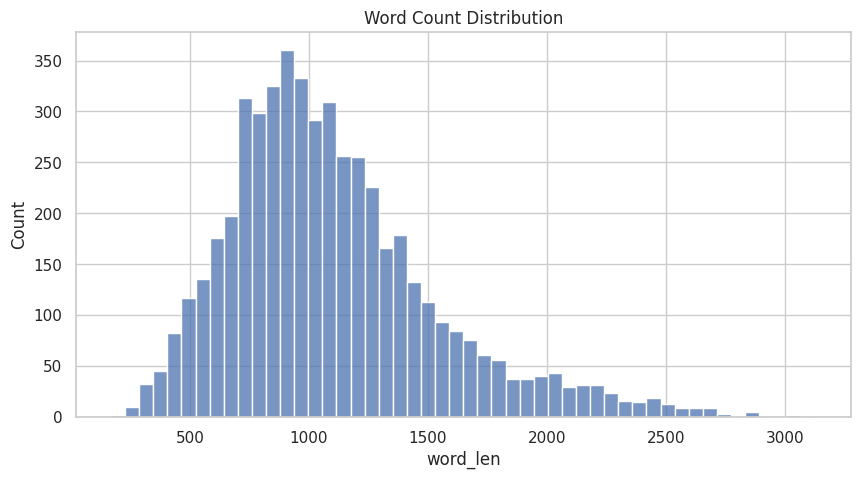

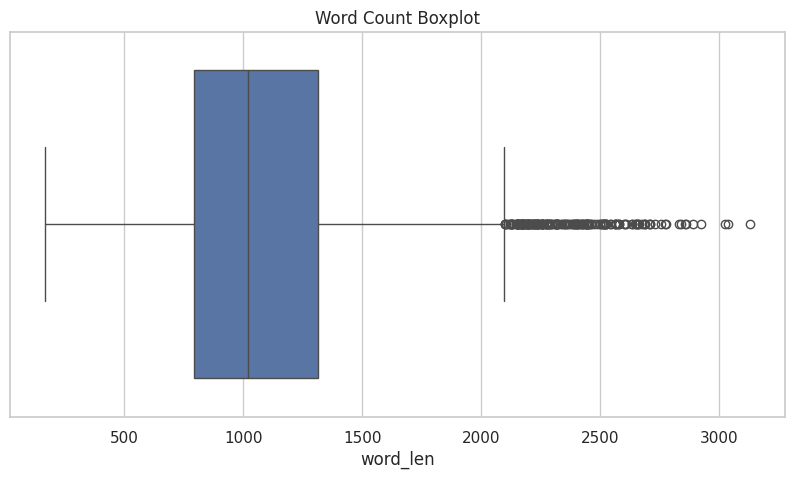

In [ ]:
train_df['char_len'] = train_df['text'].str.len()
train_df['word_len'] = train_df['text'].str.split().apply(len)

plt.figure(figsize=(10,5))
sns.histplot(train_df['word_len'], bins=50)
plt.title("Word Count Distribution")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x=train_df['word_len'])
plt.title("Word Count Boxplot")
plt.show()

ATS Score Distribution

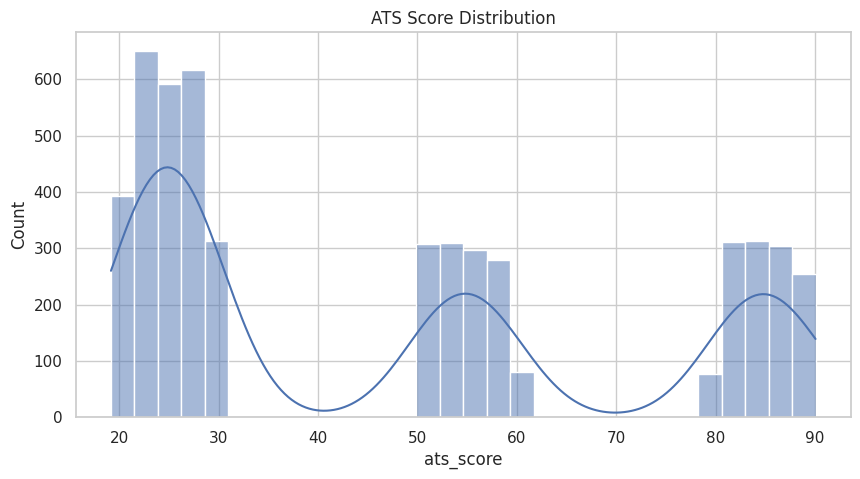

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(train_df['ats_score'], bins=30, kde=True)
plt.title("ATS Score Distribution")
plt.show()

Text Length VS ATS Score

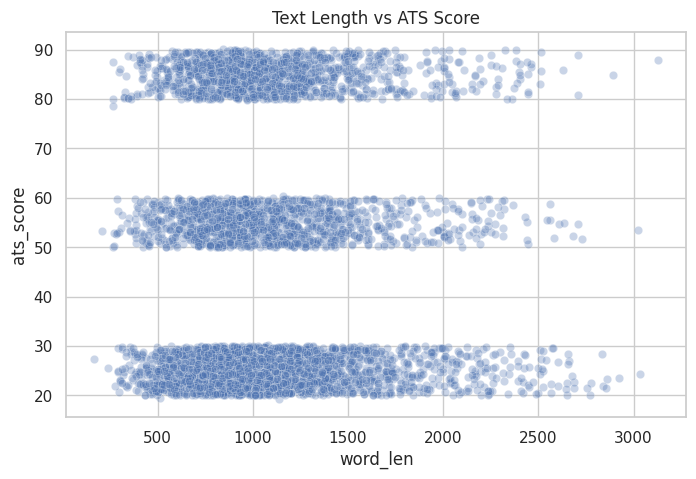

,word_len,ats_score
word_len,1.000000,0.006843
ats_score,0.006843,1.000000


In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=train_df['word_len'], y=train_df['ats_score'], alpha=0.3)
plt.title("Text Length vs ATS Score")
plt.show()

train_df[['word_len','ats_score']].corr()

Word Cloud (High Score)

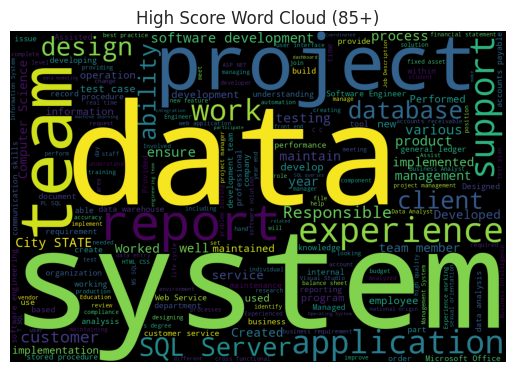

In [ ]:
high_text = " ".join(train_df[train_df['ats_score'] > 85]['text'].tolist())

wc = WordCloud(width=1200, height=800).generate(high_text)
plt.imshow(wc)
plt.axis('off')
plt.title("High Score Word Cloud (85+)")
plt.show()

Word Cloud (Low Score)

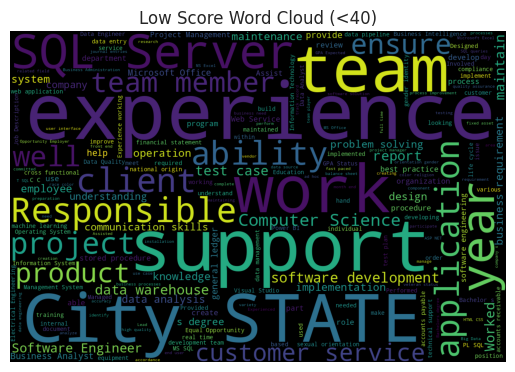

In [ ]:
low_text = " ".join(train_df[train_df['ats_score'] < 40]['text'].tolist())

wc = WordCloud(width=1200, height=800).generate(low_text)
plt.imshow(wc)
plt.axis('off')
plt.title("Low Score Word Cloud (<40)")
plt.show()

Top TF-IDF Keywords

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_features=50)
tfidf.fit(train_df['text'])

top_words = tfidf.get_feature_names_out()
top_words

array(['accounting', 'analysis', 'application', 'applications',
       'business', 'client', 'company', 'customer', 'data', 'database',
       'design', 'developed', 'development', 'end', 'engineer',
       'engineering', 'experience', 'financial', 'including',
       'information', 'knowledge', 'management', 'new', 'process',
       'project', 'projects', 'quality', 'reporting', 'reports',
       'requirements', 'server', 'services', 'skills', 'software',
       'solutions', 'sql', 'state', 'support', 'systems', 'team',
       'technical', 'test', 'testing', 'time', 'using', 'various', 'web',
       'work', 'working', 'years'], dtype=object)

In [ ]:
import re
def split_resume_jd(text):
    # Common markers: "Resume:", "Job Description:", "Responsibilities:"
    parts = re.split(r"(Resume:|Job Description:|Responsibilities:)", text, flags=re.I)
    return parts

train_df["split"] = train_df["text"].apply(split_resume_jd)
train_df["split"].head()

,split
0,[SummaryI am seeking a position wherein I may ...
1,[ProfileHighly motivated Sales Associate with ...
2,[SummaryHaving achieved a milestone of 7 years...
3,[SummaryWireless communications engineer with ...
4,[SummaryData Entry experienced and adept at in...


Summary

In [ ]:
print("Avg words:", train_df['word_len'].mean())
print("Avg ATS score:", train_df['ats_score'].mean())
print("Top 20 TF-IDF words:", top_words[:20])

Avg words: 1099.3863502647578
Avg ATS score: 47.187452441655225
Top 20 TF-IDF words: ['accounting' 'analysis' 'application' 'applications' 'business' 'client'
 'company' 'customer' 'data' 'database' 'design' 'developed' 'development'
 'end' 'engineer' 'engineering' 'experience' 'financial' 'including'
 'information']


Model Training

In [ ]:
!pip install scikit-learn

Cleaning

In [ ]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-z0-9\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

train_df["clean_text"] = train_df["text"].apply(clean_text)
val_df["clean_text"] = val_df["text"].apply(clean_text)

TF-IDF Baseline + Linear Regression

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Vectorizer
tfidf = TfidfVectorizer(max_features=20000)

X_train = tfidf.fit_transform(train_df["clean_text"])
X_val = tfidf.transform(val_df["clean_text"])

y_train = train_df["ats_score"]
y_val = val_df["ats_score"]

# Model
model_tfidf = LinearRegression()
model_tfidf.fit(X_train, y_train)

# Predict
preds = model_tfidf.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, preds))
mae = mean_absolute_error(y_val, preds)

rmse, mae

(np.float64(23.332556043668877), 18.669009340087133)

Sentence-Transformer Embedding Baseline

In [ ]:
!pip install sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np

model = SentenceTransformer('all-MiniLM-L6-v2')   # CPU friendly

# Compute embeddings
train_emb = model.encode(train_df["clean_text"].tolist(), show_progress_bar=True)
val_emb = model.encode(val_df["clean_text"].tolist(), show_progress_bar=True)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/160 [00:00<?, ?it/s]

Batches:   0%|          | 0/40 [00:00<?, ?it/s]

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=150)

rf.fit(train_emb, train_df["ats_score"])
preds_emb = rf.predict(val_emb)

rmse_emb = np.sqrt(mean_squared_error(y_val, preds_emb))
mae_emb = mean_absolute_error(y_val, preds_emb)

rmse_emb, mae_emb

(np.float64(24.66124405019721), 20.30995966149555)

In [ ]:
print("TF-IDF RMSE:", rmse)
print("TF-IDF MAE:", mae)
print("Embeddings RMSE:", rmse_emb)
print("Embeddings MAE:", mae_emb)

TF-IDF RMSE: 23.332556043668877
TF-IDF MAE: 18.669009340087133
Embeddings RMSE: 24.66124405019721
Embeddings MAE: 20.30995966149555


TF-IDF + Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

# Create, train, and predict with Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

ridge_preds = ridge.predict(X_val)

# Calculate metrics
ridge_rmse = np.sqrt(mean_squared_error(y_val, ridge_preds))
ridge_mae = mean_absolute_error(y_val, ridge_preds)

print(f"Ridge RMSE: {ridge_rmse:.4f}, MAE: {ridge_mae:.4f}")

Ridge RMSE: 21.9281, MAE: 18.4593


TF-IDF + LightGBM



In [34]:
import lightgbm as lgb

lgbm = lgb.LGBMRegressor(
    n_estimators=500, # More trees is okay because they are fast
    learning_rate=0.05,
    n_jobs=-1,
    random_state=42
)

lgbm.fit(X_train, y_train) # Note: LightGBM can handle sparse matrices directly
lgbm_preds = lgbm.predict(X_val)

lgbm_rmse = np.sqrt(mean_squared_error(y_val, lgbm_preds))
lgbm_mae = mean_absolute_error(y_val, lgbm_preds)

print("LightGBM RMSE, MAE:", lgbm_rmse, lgbm_mae)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.211041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 637417
[LightGBM] [Info] Number of data points in the train set: 5099, number of used features: 12480
[LightGBM] [Info] Start training from score 47.187452
LightGBM RMSE, MAE: 19.72084584947712 15.627350117213181


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Improve the TF-IDF features (Bigrams)

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf2 = TfidfVectorizer(
    max_features=40000,
    ngram_range=(1,2) # unigrams + bigrams
)

X_train2 = tfidf2.fit_transform(train_df["clean_text"])
X_val2 = tfidf2.transform(val_df["clean_text"])

# 3b. Rerun Ridge with the new features
ridge2 = Ridge(alpha=1.0)
ridge2.fit(X_train2, y_train)

ridge2_preds = ridge2.predict(X_val2)

ridge2_rmse = np.sqrt(mean_squared_error(y_val, ridge2_preds))
ridge2_mae = mean_absolute_error(y_val, ridge2_preds)

print("TF-IDF (bigrams) + Ridge RMSE, MAE:", ridge2_rmse, ridge2_mae)

TF-IDF (bigrams) + Ridge RMSE, MAE: 21.85222076516151 18.32501782544337


In [38]:
# 4. Print all scores together
print("\n--- Model Performance Comparison ---")
print(f"Baseline TF-IDF LR: {rmse:.4f}, {mae:.4f}")
print(f"Ridge: {ridge_rmse:.4f}, {ridge_mae:.4f}")
print(f"LightGBM RMSE, MAE: {lgbm_rmse}, {lgbm_mae}")
print(f"TF-IDF (bigrams) + Ridge: {ridge2_rmse:.4f}, {ridge2_mae:.4f}")
print("----------------------------------\n")

# NOTE: The baseline variables 'rmse' and 'mae' must be defined
# from your previous Linear Regression run for this print to work.


--- Model Performance Comparison ---
Baseline TF-IDF LR: 23.3326, 18.6690
Ridge: 21.9281, 18.4593
LightGBM RMSE, MAE: 19.72084584947712, 15.627350117213181
TF-IDF (bigrams) + Ridge: 21.8522, 18.3250
----------------------------------



Exporting the Model

In [39]:
import joblib

# Ensure you have the lgbm model trained from the previous step
# (Or retrain the winning LightGBM model if the variable was lost)

# 1. Save the model to a file
joblib.dump(lgbm, 'lgbm_model.joblib')
print("✅ LightGBM model saved to 'lgbm_model.joblib'")

# 2. Save the final optimized TF-IDF vectorizer (tfidf2, which includes bigrams)
# The model can't predict without the exact same feature mapping!
joblib.dump(tfidf2, 'tfidf_vectorizer.joblib')
print("✅ TF-IDF Vectorizer (bigrams) saved to 'tfidf_vectorizer.joblib'")

✅ LightGBM model saved to 'lgbm_model.joblib'
✅ TF-IDF Vectorizer (bigrams) saved to 'tfidf_vectorizer.joblib'
